<a href="https://colab.research.google.com/github/Alexey504/CustomerChurn/blob/main/%D0%9E%D1%82%D1%82%D0%BE%D0%BAStepik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline

In [ ]:
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test-2.csv')

# Первичный анализ

In [ ]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
train.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
train.HasInternetService.value_counts()

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

In [ ]:
train.HasOnlineSecurityService.value_counts()

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

In [ ]:
train.HasContractPhone.value_counts()

Month-to-month    2920
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64

In [ ]:
train.PaymentMethod.value_counts()

Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64

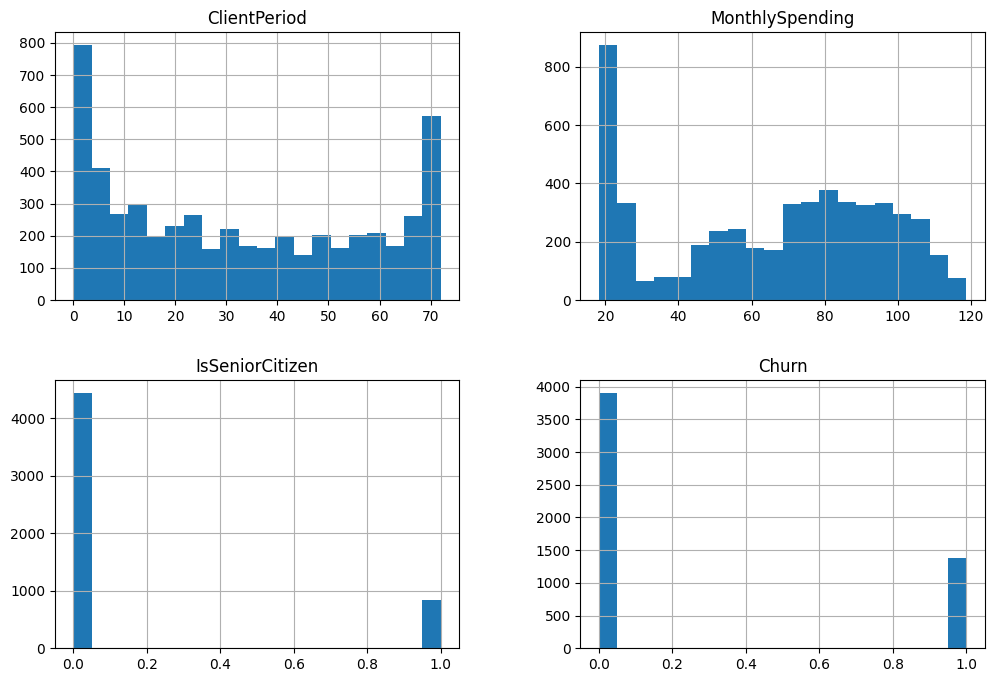

In [ ]:
train.hist(bins=20, figsize=(12,8))
plt.show()

# Удаление нескольких признаков

In [ ]:
for_drop = ['Sex', 'HasPartner', 'HasChild', 'HasOnlineSecurityService',
            'HasOnlineBackup',	'HasDeviceProtection',	'HasTechSupportAccess',	'HasOnlineTV',	'HasMovieSubscription']
train_dropped= train.drop(columns=for_drop)
test_dropped= test.drop(columns=for_drop)

#train_dropped.loc[train_dropped['TotalSpent'] == ' ', 'TotalSpent'] = 0
#train_dropped['TotalSpent'] = train_dropped['TotalSpent'].astype(float)

# Разделение выборки

In [ ]:
train_set, val_set = train_test_split(
                                      train,
                                      test_size=0.2,
                                      random_state=42,
                                      stratify=train['Churn']) #  stratify=train.Churn

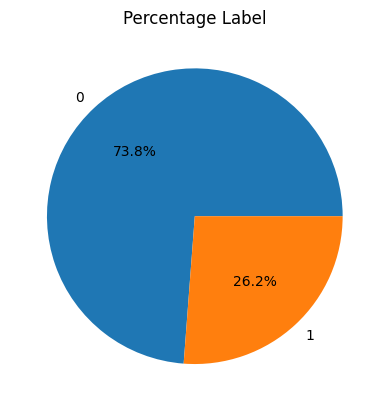

4225


In [ ]:
label_count = train_set['Churn'].value_counts()

#Setting
_,axes = plt.subplots()

#Pie chart
axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%')
axes.set_title('Percentage Label')


plt.show()
print(len(train_set))

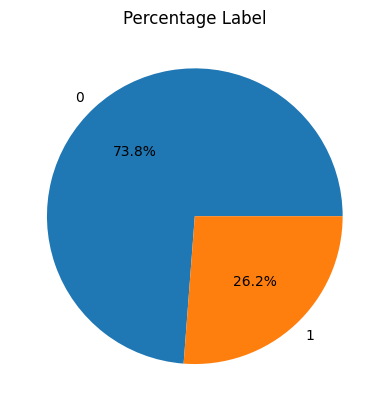

1057


In [ ]:
label_count = val_set['Churn'].value_counts()

#Setting
_,axes = plt.subplots()

#Pie chart
axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%')
axes.set_title('Percentage Label')


plt.show()
print(len(val_set))

# Обработка признаков(тест)

In [ ]:
clients = train_set.copy()

In [ ]:
clients.loc[clients['TotalSpent'] == ' ', 'TotalSpent'] = 0
clients['TotalSpent'] = clients['TotalSpent'].astype(float)

In [ ]:
X = clients['TotalSpent']
X.replace([' '], 0, inplace=True)
X = X.astype(float)

In [ ]:
corr_matrix = clients.corr()

<ipython-input-103-3a7b3e37856c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clients.corr()


<Axes: >

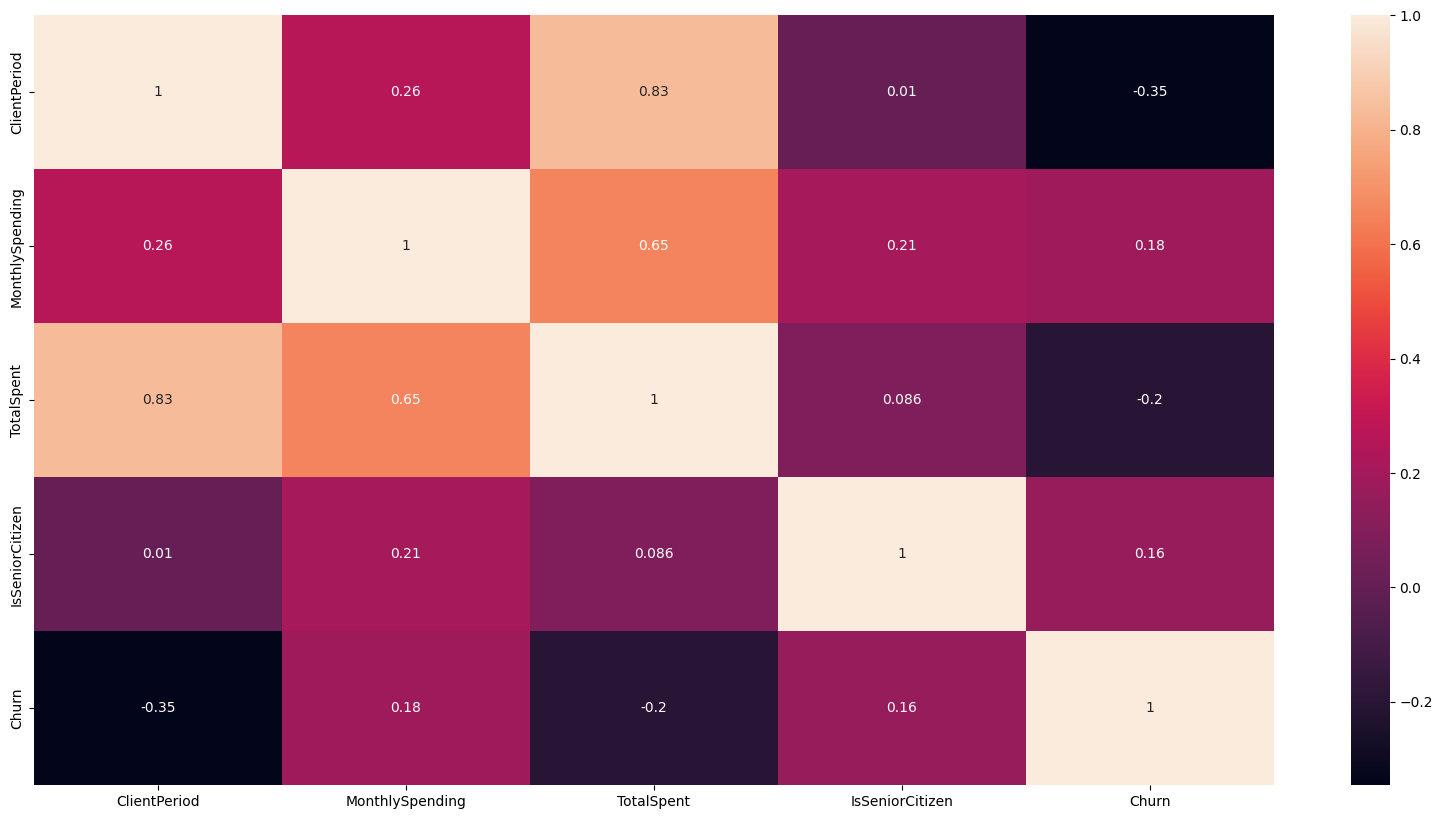

In [ ]:
import seaborn as sns
plt.figure(figsize= (20, 10))
sns.heatmap(corr_matrix, annot = True)

In [ ]:
corr_matrix.Churn.sort_values(ascending=False)

Churn              1.000000
MonthlySpending    0.184042
IsSeniorCitizen    0.161706
TotalSpent        -0.199706
ClientPeriod      -0.346044
Name: Churn, dtype: float64

In [ ]:
clients_cat_col = [cname for cname in clients.columns if
                    clients[cname].dtype == "object"]
clients_cat_col

['Sex',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',
                           sparse=False)
OH_clients_col = pd.DataFrame(OH_encoder.fit_transform(clients[clients_cat_col]), columns=OH_encoder.get_feature_names_out())
OH_clients_col.index = clients.index
num_clients = clients.drop(clients_cat_col, axis=1)
OH_clients = pd.concat([num_clients, OH_clients_col], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OH_clients.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4170,1,69.85,69.85,1,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
84,67,50.55,3260.10,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1230,40,71.35,2847.20,0,0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2426,54,89.40,4869.50,0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4502,19,87.70,1725.95,0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
corr_matrix = OH_clients.corr()

In [ ]:
corr_matrix.Churn.sort_values(ascending=False)

Churn                                           1.000000
HasContractPhone_Month-to-month                 0.398620
HasOnlineSecurityService_No                     0.348110
HasTechSupportAccess_No                         0.329005
PaymentMethod_Electronic check                  0.300431
HasInternetService_Fiber optic                  0.295875
HasOnlineBackup_No                              0.270629
HasDeviceProtection_No                          0.251217
IsBillingPaperless_Yes                          0.190547
MonthlySpending                                 0.184042
IsSeniorCitizen                                 0.161706
HasChild_No                                     0.152083
HasPartner_No                                   0.149318
HasMovieSubscription_No                         0.145314
HasOnlineTV_No                                  0.118382
HasOnlineTV_Yes                                 0.067672
HasMultiplePhoneNumbers_Yes                     0.040915
HasMovieSubscription_Yes       

<Axes: >

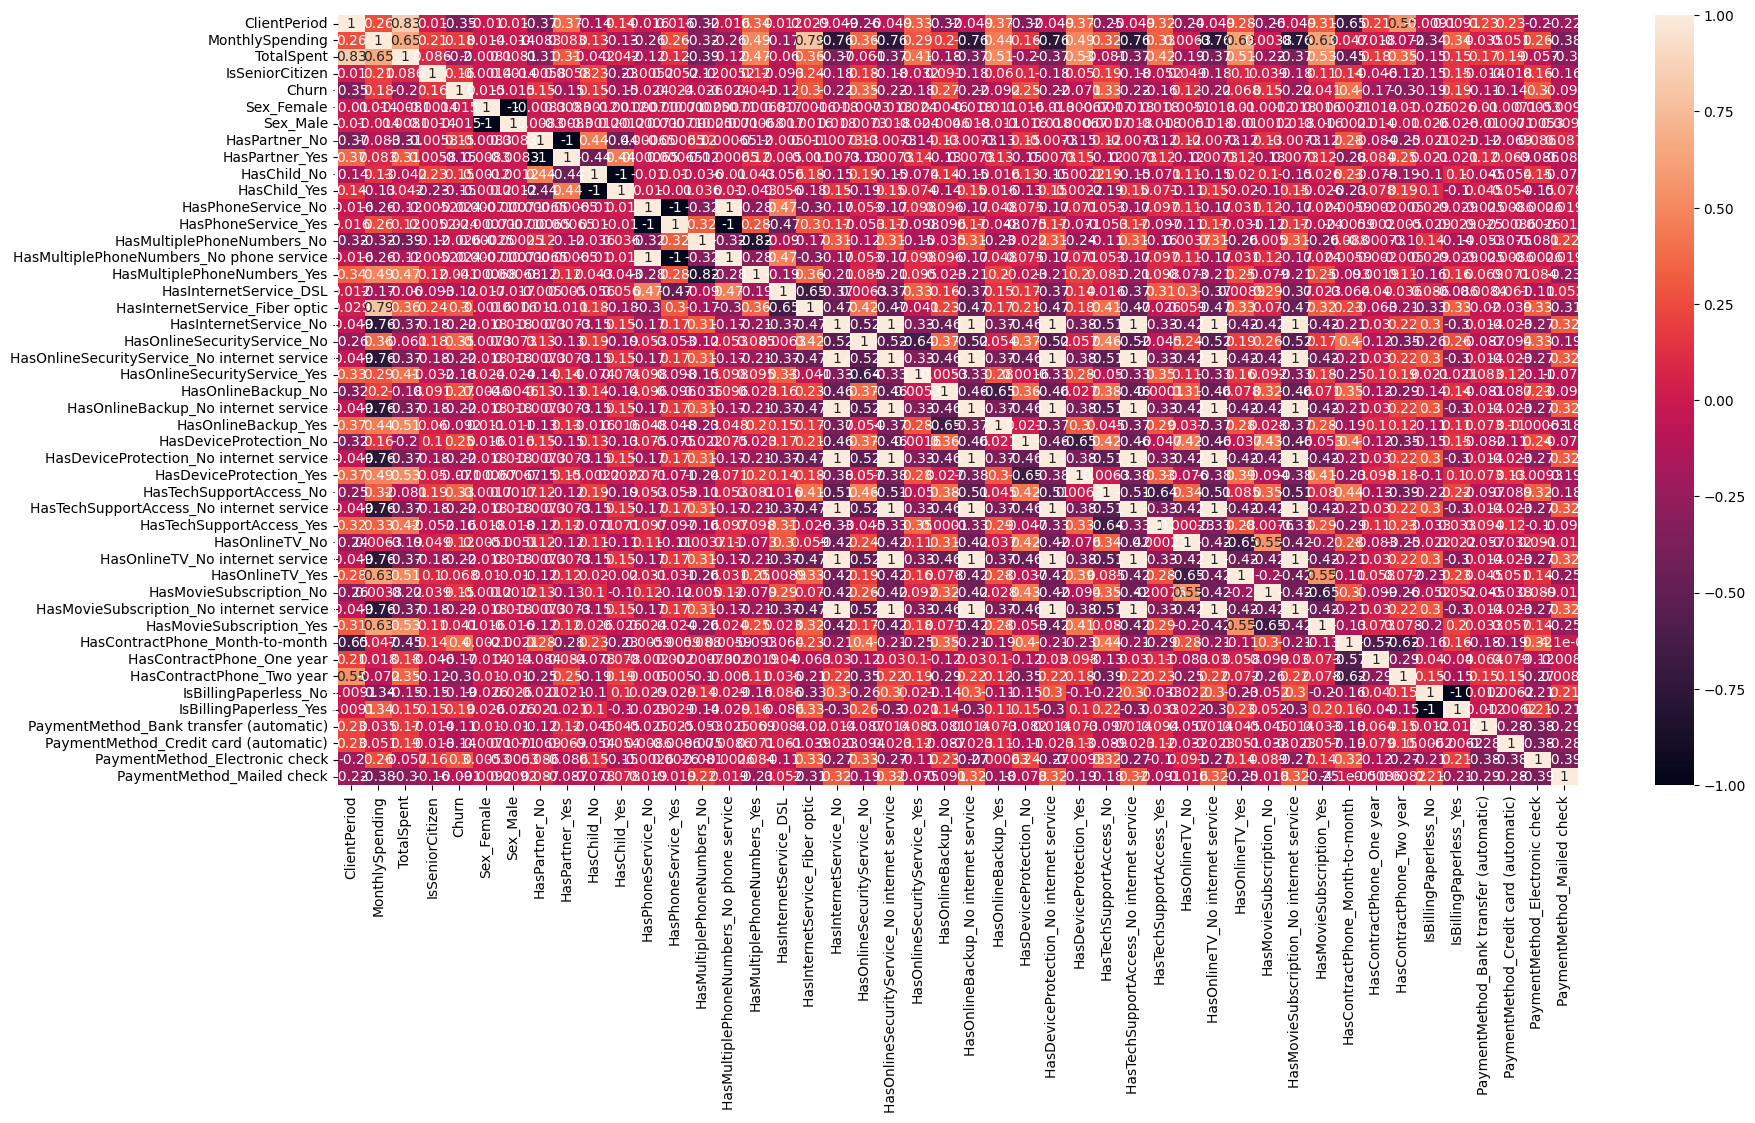

In [ ]:
import seaborn as sns
plt.figure(figsize= (20, 10))
sns.heatmap(corr_matrix, annot = True)

In [ ]:
for_drop = corr_matrix.loc[(corr_matrix.HasInternetService_No.sort_values(ascending=False) == 1)].index
for_drop

Index(['HasInternetService_No', 'HasOnlineSecurityService_No internet service',
       'HasOnlineBackup_No internet service',
       'HasDeviceProtection_No internet service',
       'HasTechSupportAccess_No internet service',
       'HasOnlineTV_No internet service',
       'HasMovieSubscription_No internet service'],
      dtype='object')

<ipython-input-121-7ca563055144>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_matrix = corr_matrix[corr_matrix.HasInternetService_No.sort_values(ascending=False) < 1]


<Axes: >

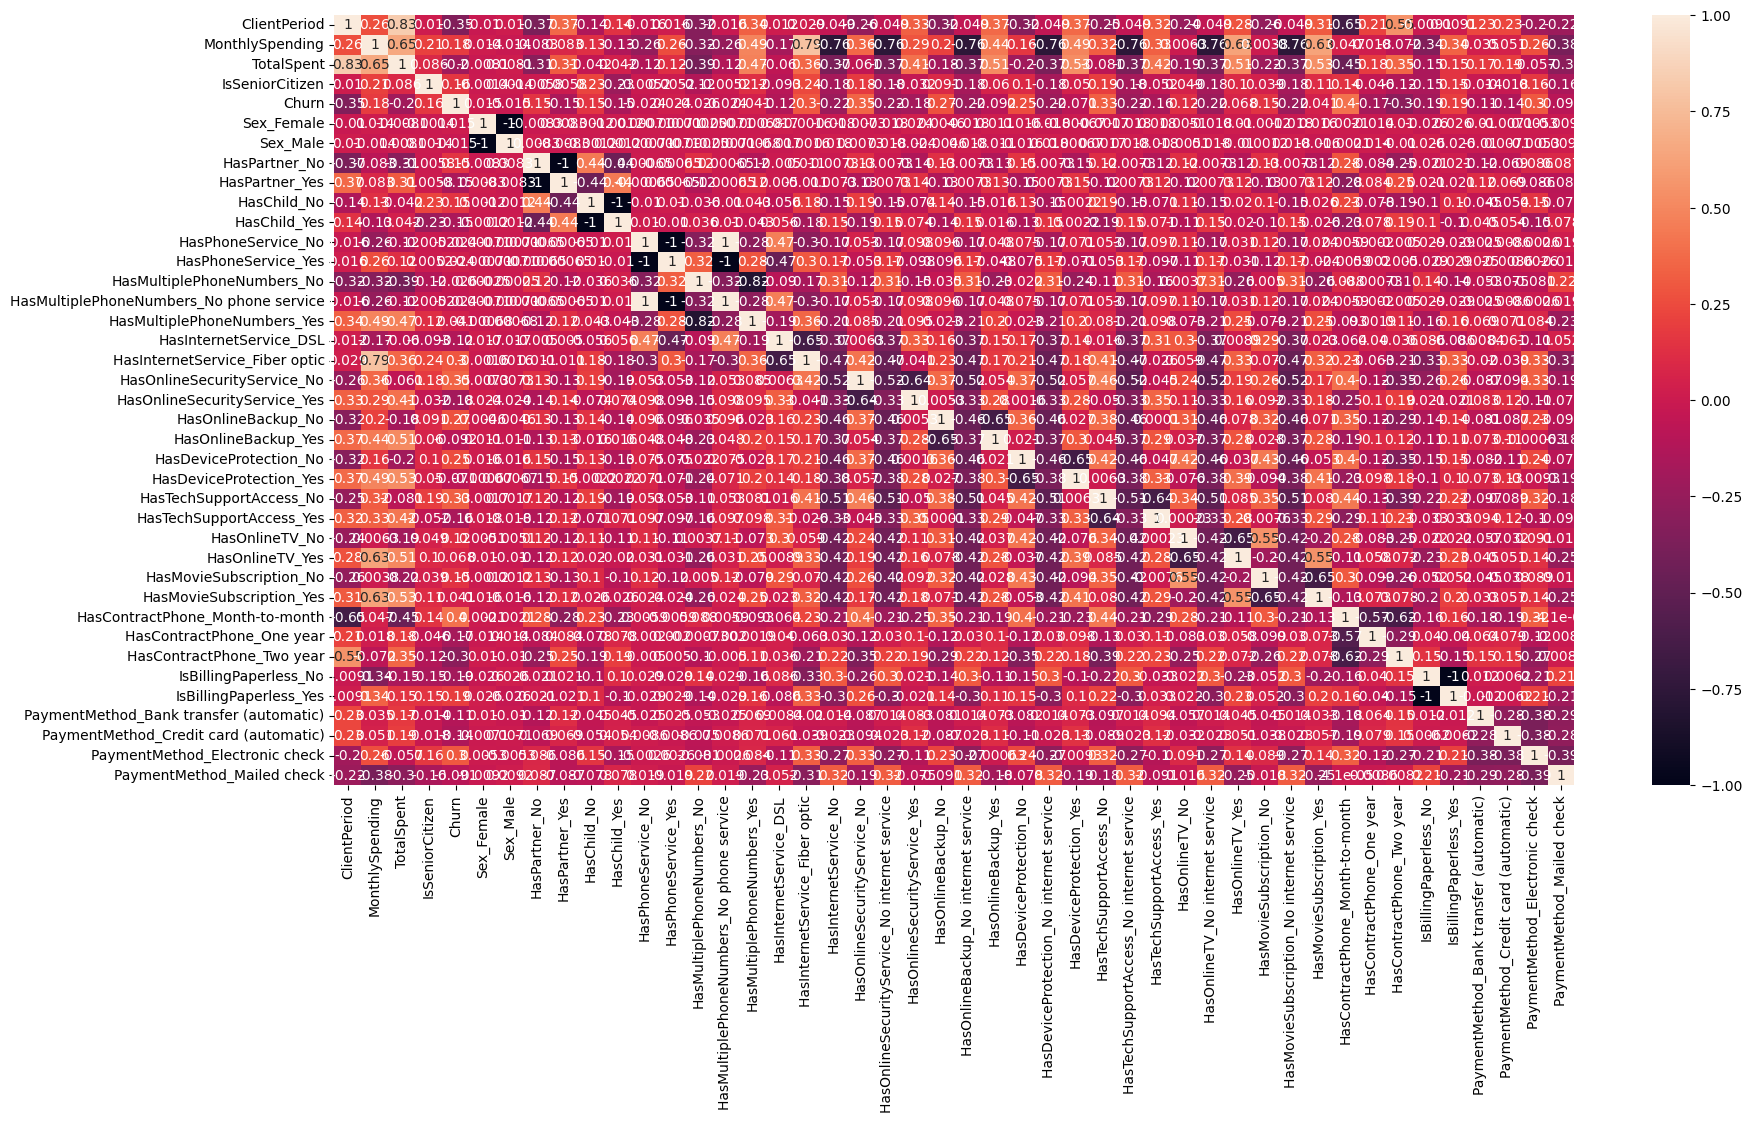

In [ ]:
corr_matrix = corr_matrix[corr_matrix.HasInternetService_No.sort_values(ascending=False) < 1]
plt.figure(figsize= (20, 10))
sns.heatmap(corr_matrix, annot = True)

# Подготовка к обучению

In [ ]:
clients = train_set.drop('Churn', axis=1)
clients_labels= train_set['Churn'].copy()

In [ ]:
val_clients = val_set.drop('Churn', axis=1)
val_clients_labels= val_set['Churn'].copy()

In [ ]:
# на всем train
clients = train.drop('Churn', axis=1)
clients_labels= train['Churn'].copy()

In [ ]:
# с категориальными признаками
clients = train_dropped.drop('Churn', axis=1)
clients_labels= train_dropped['Churn'].copy()

In [ ]:
# estimator = FunctionTransformer(change_total)

In [ ]:
cat_attribs = [
'Sex',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
    SimpleImputer(strategy="most_frequent")
    )

num_pipeline = make_pipeline(
    #SimpleImputer(strategy="median"),
    StandardScaler()
    )

In [ ]:
def change_total(X, y=None):
  X.replace([' '], 0, inplace=True)
  # X = X.astype(float)
  return X.astype(float)


def change_pipeline():
    return make_pipeline(
        FunctionTransformer(change_total, feature_names_out="one-to-one"),
        StandardScaler())

preprocessing = ColumnTransformer([
    ("TotalSpent", change_pipeline(), ["TotalSpent"] ),
    ("cat", cat_pipeline, cat_attribs),
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
])

In [ ]:
clients_prepared = preprocessing.fit_transform(clients)
clients_prepared.shape

(5282, 45)

AttributeError: 'ColumnTransformer' object has no attribute 'info'

In [ ]:
preprocessing.get_feature_names_out()

array(['TotalSpent__TotalSpent', 'cat__HasPhoneService_No',
       'cat__HasPhoneService_Yes', 'cat__HasMultiplePhoneNumbers_No',
       'cat__HasMultiplePhoneNumbers_No phone service',
       'cat__HasMultiplePhoneNumbers_Yes', 'cat__HasInternetService_DSL',
       'cat__HasInternetService_Fiber optic',
       'cat__HasInternetService_No',
       'cat__HasContractPhone_Month-to-month',
       'cat__HasContractPhone_One year', 'cat__HasContractPhone_Two year',
       'cat__IsBillingPaperless_No', 'cat__IsBillingPaperless_Yes',
       'cat__PaymentMethod_Bank transfer (automatic)',
       'cat__PaymentMethod_Credit card (automatic)',
       'cat__PaymentMethod_Electronic check',
       'cat__PaymentMethod_Mailed check', 'num__ClientPeriod',
       'num__MonthlySpending', 'num__IsSeniorCitizen'], dtype=object)

In [ ]:
prep_df = pd.DataFrame(clients_prepared, columns=preprocessing.get_feature_names_out())
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   TotalSpent__TotalSpent        5282 non-null   object
 1   cat__HasPhoneService          5282 non-null   object
 2   cat__HasMultiplePhoneNumbers  5282 non-null   object
 3   cat__HasInternetService       5282 non-null   object
 4   cat__HasContractPhone         5282 non-null   object
 5   cat__IsBillingPaperless       5282 non-null   object
 6   cat__PaymentMethod            5282 non-null   object
 7   num__ClientPeriod             5282 non-null   object
 8   num__MonthlySpending          5282 non-null   object
 9   num__IsSeniorCitizen          5282 non-null   object
dtypes: object(10)
memory usage: 412.8+ KB


In [ ]:
cat_col = [cname for cname in prep_df.columns if
                    prep_df[cname].dtype == "object"]
cat_col

['TotalSpent__TotalSpent',
 'cat__Sex',
 'cat__HasPartner',
 'cat__HasChild',
 'cat__HasPhoneService',
 'cat__HasMultiplePhoneNumbers',
 'cat__HasInternetService',
 'cat__HasOnlineSecurityService',
 'cat__HasOnlineBackup',
 'cat__HasDeviceProtection',
 'cat__HasTechSupportAccess',
 'cat__HasOnlineTV',
 'cat__HasMovieSubscription',
 'cat__HasContractPhone',
 'cat__IsBillingPaperless',
 'cat__PaymentMethod',
 'num__ClientPeriod',
 'num__MonthlySpending',
 'num__IsSeniorCitizen']

# Обучение

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
DTC = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
DTC.fit(clients, clients_labels)

ROC_AUC_score = 0.9999985514073657


In [ ]:
# на train
predictions = DTC.predict_proba(clients)
print(f"train ROC_AUC_score = {roc_auc_score(clients_labels, predictions[:,1])}")
# на valid
predictions = DTC.predict_proba(val_clients)
print(f"valid ROC_AUC_score = {roc_auc_score(val_clients_labels, predictions[:,1])}")

train ROC_AUC_score = 0.9999985514073657
valid ROC_AUC_score = 0.6723942423400907


In [ ]:
RFC = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
RFC.fit(clients, clients_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('TotalSpent',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function change_total at 0x7bcc108f0820>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'...
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc0e29f4c0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# на train
predictions = RFC.predict_proba(clients)
print(f"train ROC_AUC_score = {roc_auc_score(clients_labels, predictions[:,1])}")
# на valid
predictions = RFC.predict_proba(val_clients)
print(f"valid ROC_AUC_score = {roc_auc_score(val_clients_labels, predictions[:,1])}")

train ROC_AUC_score = 0.9999971028147314
valid ROC_AUC_score = 0.8329098398592983


In [ ]:
forest_roc_auc = -cross_val_score(RFC, clients, clients_labels,
                                  scoring="roc_auc", cv=10)
pd.Series(forest_roc_auc).describe()

count    10.000000
mean     -0.815089
std       0.021571
min      -0.840268
25%      -0.826574
50%      -0.825062
75%      -0.804129
max      -0.767060
dtype: float64

# Тестирование моделей

In [ ]:
def test_model(prep, clf, X, y):
  model = make_pipeline(prep, clf)
  model.fit(X, y)
  labels_probas_model = cross_val_predict(model, X, y, cv=3,
                                        method="predict_proba")
  labels_scores_model = labels_probas_model[:, 1]
  print(f'{type(clf).__name__} : {roc_auc_score(y, labels_scores_model)}')


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# cat_features
CB = make_pipeline(preprocessing, CatBoostClassifier(random_state=42, cat_features=list(range(1, 7)), silent=True))
CB.fit(clients, clients_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('TotalSpent',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function change_total at 0x7a78b66c8280>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent...
                                                  ['HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a78b6d24a60>)])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7a78b6d24670>)])

In [ ]:
# OH
CB = make_pipeline(preprocessing, CatBoostClassifier(random_state=42,  silent=True))
CB.fit(clients, clients_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('TotalSpent',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function change_total at 0x7a78b66f2a70>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'...
                                                  ['HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a78b6c6b9a0>)])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7a78b679ea40>)])

In [ ]:
clients_labels

4170    1
84      0
1230    0
2426    0
4502    0
       ..
3229    0
28      1
3914    0
3573    0
2494    0
Name: Churn, Length: 4225, dtype: int64

In [ ]:
# на train
predictions_train = CB.predict_proba(clients)
print(f"train ROC_AUC_score = {roc_auc_score(clients_labels, predictions_train[:,1])}")
# на valid
predictions_valid = CB.predict_proba(val_clients)
print(f"valid ROC_AUC_score = {roc_auc_score(val_clients_labels, predictions_valid[:,1])}")

train ROC_AUC_score = 0.9523957694141834
valid ROC_AUC_score = 0.8438720725724336


In [ ]:
# confusion_matrix(val_clients_labels, predictions[:,1])
predictions[:,1]

array([0.24340496, 0.0138754 , 0.04078776, ..., 0.90198894, 0.39067711,
       0.6417502 ])

In [ ]:
y_train_pred = cross_val_predict(CB, clients, clients_labels, cv=5)
confusion_matrix(clients_labels, y_train_pred)

array([[3496,  402],
       [ 682,  702]])

In [ ]:
y_train_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
labels_probas_CB = cross_val_predict(CB, clients, clients_labels, cv=3,
                                        method="predict_proba")


In [ ]:
labels_scores_CB = labels_probas_CB[:, 1]

precisions_CB, recalls_CB, thresholds_CB = precision_recall_curve(clients_labels, labels_scores_CB)
#precisions_CB, recalls_CB, thresholds_CB = precision_recall_curve(val_clients_labels, predictions_valid[:,1])

In [ ]:
f1_scores = 2*recalls_CB*precisions_CB/(recalls_CB+precisions_CB)
print('Best threshold: ', thresholds_CB[np.argmax(f1_scores)])

Best threshold:  0.2749533096246369


In [ ]:
idx_for_90_precision = (precisions_CB >= 0.90).argmax()
threshold_for_90_precision = thresholds_CB[idx_for_90_precision]
threshold_for_90_precision

0.8845573001963398

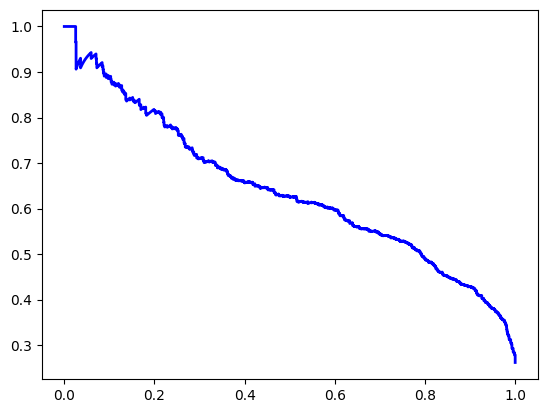

In [ ]:
plt.plot(recalls_CB, precisions_CB, "b-", linewidth=2,
             label="CatBoost")
#plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(clients_labels, labels_scores_CB)  # predictions_valid[:,1] / labels_scores_CB

# idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
# tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

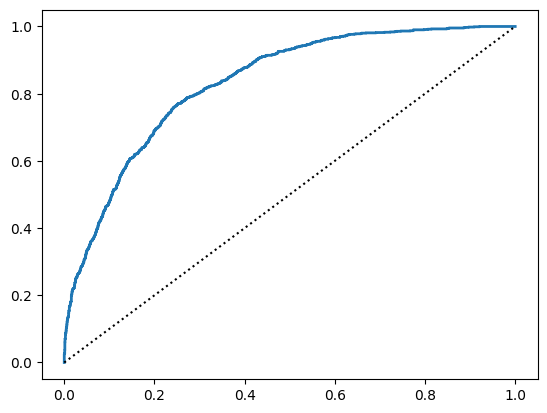

In [ ]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
# plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [ ]:
labels_pred_CB = labels_probas_CB[:, 1] >= 0.27
# labels_pred_CB = predictions_valid[:,1] >= 0.5

f1_score(clients_labels, labels_pred_CB)

0.620183486238532

In [ ]:
roc_auc_score(clients_labels, labels_scores_CB)

0.8387773706391599

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = make_pipeline(preprocessing, XGBClassifier(random_state=42, ))
xgb.fit(clients, clients_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('TotalSpent',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function change_total at 0x7a78b66f2a70>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
predictions_valid = xgb.predict_proba(val_clients)
print(f"valid ROC_AUC_score = {roc_auc_score(val_clients_labels, predictions_valid[:,1])}")

valid ROC_AUC_score = 0.9855155975192077


In [ ]:
labels_probas_xgb = cross_val_predict(xgb, clients, clients_labels, cv=3,
                                        method="predict_proba")
labels_scores_xgb = labels_probas_xgb[:, 1]

precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(clients_labels, labels_scores_xgb)
fpr, tpr, thresholds = roc_curve(clients_labels, labels_scores_xgb)

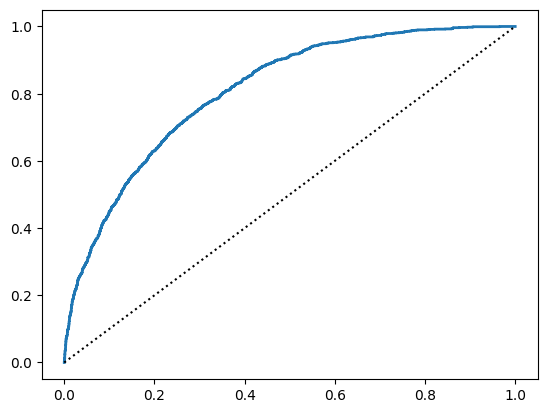

In [ ]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
# plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [ ]:
roc_auc_score(clients_labels, labels_scores_xgb)

0.8071313434783511

# Сравнение моделей

In [ ]:
models = []
models.append(LogisticRegression(random_state=42, verbose=0, C=6000))
models.append(KNeighborsClassifier( n_jobs=-1, n_neighbors=50))
models.append(XGBClassifier(n_estimators=100, random_state=42))
models.append(RandomForestClassifier(n_estimators=100, random_state=42))
models.append(GradientBoostingClassifier(n_estimators=100, random_state=42))
models.append(CatBoostClassifier(random_state=42, silent=True, n_estimators=100))

for m in models:
    test_model(preprocessing, m, clients, clients_labels)

LogisticRegression : 0.8430314419429558
KNeighborsClassifier : 0.8317374850597757
XGBClassifier : 0.8089910862840586
RandomForestClassifier : 0.8144890332080776
GradientBoostingClassifier : 0.8397165101712157
CatBoostClassifier : 0.8332774774080082


# Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("LogReg", LogisticRegression(random_state=42,)),  # silent=True CatBoostClassifier(random_state=42, silent=True, cat_features=list(range(1, 7))
    ])

param_grid = {
        "LogReg__max_iter": np.arange(50, 300, 50),
        "LogReg__penalty": ['l1', 'l2', 'elasticnet'],
        "LogReg__C": np.arange(3000, 8000, 1000),
        "LogReg__class_weight": ['balanced', None],
#       "CatBoost__iterations": [1000, 2000],
#        "CatBoost__learning_rate": [0.001, 0.01, 0.1],
#        "CatBoost__depth": [5,  15,  40],
#        "CatBoost__subsample": [0.05, 0.5, 1],
#        "CatBoost__colsample_bylevel": [0.05,  0.5, 1],
#        "CatBoost__n_estimators": [6, 30, 45]
#       "min_data_in_leaf": [10, 30, 60, 80, 100],
}

grid_search = GridSearchCV(estimator=full_pipeline, param_grid=param_grid, cv=3,
                               scoring='roc_auc', verbose=2)

grid_search.fit(clients, clients_labels)


Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weig

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=3000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weigh

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=4000, LogReg__class_weight=None, LogReg__max_iter=100, Log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weig

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=5000, LogReg__class_weight=None, LogReg__max_iter=100, Lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.2s
[CV] END LogReg__C=6000, LogReg__class_weig

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=6000, LogReg__class_weight=None, LogReg__max_iter=100, Lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=balanced, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=50, LogReg__penalty=elasticnet; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l1; total time=   0.0s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__penalty=l2; total time=   0.1s
[CV] END LogReg__C=7000, LogReg__class_weight=None, LogReg__max_iter=100, LogReg__

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('TotalSpent',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function change_total at 0x7a78b6c56e60>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalSpent']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a78b6b3b250>)])),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'LogReg__C': array([3000, 4000, 5000, 6000, 7000]),
                         'LogReg__class_weight': ['balanced', None],
                         'LogReg__max_iter': array([ 50, 100, 150, 200, 250]),
                         'LogReg__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("CatBoost", CatBoostClassifier(random_state=42,)),  # silent=True
    ])

param_grid = {
        "CatBoost__iterations": [1000, 2000],
        "CatBoost__learning_rate": uniform(0.0001, 0.1),
        "CatBoost__depth": randint(low=5, high=50),
        "CatBoost__subsample": uniform(0.05, 1),
        "CatBoost__colsample_bylevel": uniform(0.05, 1),
#        "CatBoost__n_estimators": [6]
#       "min_data_in_leaf": [10, 30, 60, 80, 100],
}

rnd_search = RandomizedSearchCV(
        full_pipeline, param_distributions=param_grid, n_iter=10, cv=3,
        scoring='roc_auc', random_state=42)

rnd_search.fit(clients, clients_labels)

In [ ]:
grid_search.best_params_

{'LogReg__C': 6000,
 'LogReg__class_weight': None,
 'LogReg__max_iter': 100,
 'LogReg__penalty': 'l2'}

In [ ]:
grid_search.best_params_

{'CatBoost__colsample_bylevel': 0.5,
 'CatBoost__learning_rate': 0.1,
 'CatBoost__n_estimators': 30,
 'CatBoost__subsample': 1}

In [ ]:
rnd_search.best_params_

{'CatBoost__colsample_bylevel': 0.9099404067363206,
 'CatBoost__depth': 11,
 'CatBoost__iterations': 1000,
 'CatBoost__learning_rate': 0.04514992519695431,
 'CatBoost__subsample': 0.06326496115986653}

In [ ]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LogReg__C,param_LogReg__class_weight,param_LogReg__max_iter,param_LogReg__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
115,0.085578,0.014413,0.020052,0.000297,6000,None,200,l2,"{'LogReg__C': 6000, 'LogReg__class_weight': No...",0.854095,0.835393,0.840116,0.843201,0.007941,1
118,0.075912,0.009505,0.018108,0.000616,6000,None,250,l2,"{'LogReg__C': 6000, 'LogReg__class_weight': No...",0.854095,0.835393,0.840116,0.843201,0.007941,1
109,0.077073,0.009680,0.017802,0.000115,6000,None,100,l2,"{'LogReg__C': 6000, 'LogReg__class_weight': No...",0.854095,0.835393,0.840116,0.843201,0.007941,1
112,0.076114,0.008364,0.020155,0.002136,6000,None,150,l2,"{'LogReg__C': 6000, 'LogReg__class_weight': No...",0.854095,0.835393,0.840116,0.843201,0.007941,1
148,0.075544,0.009399,0.019120,0.000898,7000,None,250,l2,"{'LogReg__C': 7000, 'LogReg__class_weight': No...",0.854098,0.835393,0.840112,0.843201,0.007943,5


In [ ]:
final_model = grid_search.best_estimator_
feature_importances = final_model['CatBoost'].feature_importances_
feature_importances.round(2)

array([ 8.81,  2.18,  5.22, 15.13, 31.24,  4.78,  8.52, 12.52,  8.18,
        3.41])

In [ ]:
model_845 = grid_search.best_estimator_

In [ ]:
model_845

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('TotalSpent',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function change_total at 0x7a78f457fb50>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TotalSpent']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  (...
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a78c827a9e0>)])),
                ('CatBoost',
                 <catboost.core.CatBoostClassifier object at 0x7a78c827bc10>)])

# Итоговое предсказание

In [ ]:
model = CB

In [ ]:
final_predictions = model.predict(test)

In [ ]:
output = pd.DataFrame({'Id': test.index,
                       'Churn': final_predictions})
output

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1


In [ ]:
output.to_csv('submission.csv', index=False)